In [16]:
#データを取得するセル

import sqlite3
import csv
import pandas as pd


#接続
dbpath = 'C:\\Users\\kuros\\Downloads\\telecom.sqlite3.sqlite3'
# データベースに接続します。
conn = sqlite3.connect(dbpath)
# カーソルの取得
cur = conn.cursor()
# テーブル名の確認
cur.execute('select name from sqlite_master where type = "table"')
for row in cur.fetchall():
    print(row)

#データ取得
# Clientテーブルから全データを取得
cur.execute('select * from Client')
with open('client_data.csv', 'w', newline='', encoding='utf-8') as csv_file:  # 任意のファイル名1
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in cur.description])
    csv_writer.writerows(cur)
# Recordテーブルから全データを取得
cur.execute('select * from Record')
with open('record_data.csv', 'w', newline='', encoding='utf-8') as csv_file:  # 任意のファイル名2
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([i[0] for i in cur.description])
    csv_writer.writerows(cur)


# 処理の確定
conn.commit()
# カーソルを閉じる
cur.close()
# 接続を閉じる
conn.close()

#表示
# Clientデータの読み込みと表示
print("Clientデータの概形:")
client_data = pd.read_csv('client_data.csv')
print(client_data.head())  # 最初の5行を表示
# Recordデータの読み込みと表示
print("\nRecordデータの概形:")
record_data = pd.read_csv('record_data.csv')
print(record_data.head())  # 最初の5行を表示

# Clientデータの読み込みと表示
print("Clientデータの概形:")
print("Shape:", client_data.shape)
print("Columns:", client_data.columns)

# Recordデータの読み込みと表示
print("\nRecordデータの概形:")
print("Shape:", record_data.shape)
print("Columns:", record_data.columns)



('Record',)
('Client',)
Clientデータの概形:
   uniqsubs  actvsubs new_cell crclscod asl_flag  totcalls       totmou  \
0         2         1        U        A        N      1652   4228.00000   
1         1         1        N       EA        N     14654  26400.00000   
2         1         1        Y        C        N      7903  24385.05333   
3         1         1        Y        B        N      1502   3065.00000   
4         1         1        Y        A        N      4485  14028.00000   

    totrev   adjrev    adjmou  ...  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  \
0  1504.62  1453.44   4085.00  ...       0.0       N       U       U        U   
1  2851.68  2833.88  26367.00  ...       0.0       Z       U       U        U   
2  2155.91  1934.47  24303.05  ...       0.0       N       U       Y        U   
3  2000.90  1941.81   3035.00  ...       0.0       U       Y       U        U   
4  2181.12  2166.48  13965.00  ...       0.0       I       U       U        U   

   kid11_15  kid16_17  c

In [17]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ClientデータとRecordデータの読み込み
client_data = pd.read_csv('client_data.csv')
record_data = pd.read_csv('record_data.csv')

# 1. データの統合
# 'Customer_ID' をキーにして両方のデータセットを結合
merged_data = pd.merge(client_data, record_data, on='Customer_ID', how='inner')

# 2. 欠損値の処理
# 数値データの欠損値を平均値で埋める
for column in merged_data.select_dtypes(include=['number']).columns:
    merged_data[column].fillna(merged_data[column].mean(), inplace=True)

# カテゴリカルデータの欠損値を最頻値で埋める
for column in merged_data.select_dtypes(include=['object']).columns:
    merged_data[column].fillna(merged_data[column].mode()[0], inplace=True)

# 3. データ型の変換
# カテゴリカルデータを数値データに変換（ラベルエンコーディング）
le = LabelEncoder()
for column in merged_data.select_dtypes(include=['object']).columns:
    merged_data[column] = le.fit_transform(merged_data[column])

# 4. IDの削除
merged_data.drop(columns = 'Customer_ID', inplace=True)

# 処理後のデータを表示
print("処理後のデータの概形:")
print("Shape:", merged_data.shape)
print("Columns:", merged_data.columns)
print(merged_data.head())  # 最初の5行を表示

処理後のデータの概形:
Shape: (100000, 99)
Columns: Index(['uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
       'avg6rev', 'prizm_social_one', 'area', 'dualband', 'refurb_new',
       'hnd_price', 'phones', 'models', 'hnd_webcap', 'truck', 'rv', 'ownrent',
       'lor', 'dwlltype', 'marital', 'adults', 'infobase', 'income',
       'numbcars', 'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays',
       'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'com

c:\Users\kuros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


上位10%の顧客の'rev_Mean'の合計: 991413.9941666999
それ以外の顧客の'rev_Mean'の合計: 4880584.490423509


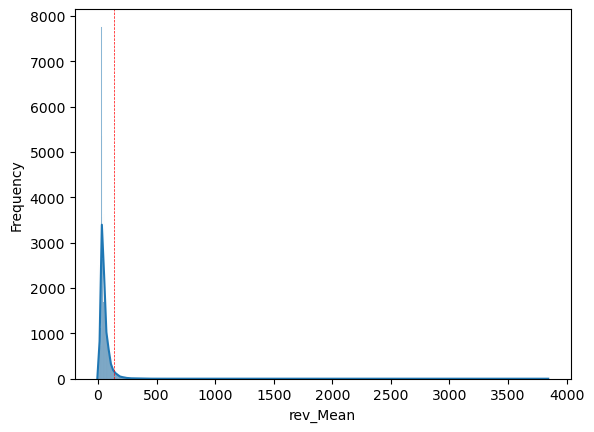

In [19]:
#EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ヒストグラムを描画
plt.figure()
sns.histplot(merged_data['rev_Mean'], kde=True)
plt.xlabel('rev_Mean')
plt.ylabel('Frequency')

# データ数に対する逆パーセンタイルを計算して、上位10%の位置を取得
top_10_percentile = np.percentile(merged_data['rev_Mean'], 95)

# 上位10%の位置に縦線を引く
plt.axvline(top_10_percentile, color='r', linestyle='--', linewidth=0.5)

# 上位5%の顧客とそれ以外の顧客に分ける
top_10_percent_customers = merged_data[merged_data['rev_Mean'] >= top_10_percentile]
other_customers = merged_data[merged_data['rev_Mean'] < top_10_percentile]

# 上位10%の顧客とそれ以外の顧客の'rev_Mean'の合計を計算
total_rev_top_10_percent = top_10_percent_customers['rev_Mean'].sum()
total_rev_other = other_customers['rev_Mean'].sum()

# 合計を表示
print("上位10%の顧客の'rev_Mean'の合計:", total_rev_top_10_percent)
print("それ以外の顧客の'rev_Mean'の合計:", total_rev_other)

plt.show()


In [20]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(merged_data.drop('churn', axis=1))
data = pd.DataFrame(data, columns=merged_data.drop('churn', axis=1).columns)
data['churn'] = merged_data['churn']

print("標準化後のデータ:")
print(data.head())


# rev_Meanの80パーセンタイルを計算
percentile_80 = data['rev_Mean'].quantile(0.95)

# 上位20%のデータを抽出
high_rev = data[data['rev_Mean'] >= percentile_80]

# 残りのデータセット
remaining_data = data[data['rev_Mean'] < percentile_80]

# 各変数についてt検定を実行
for column in data.columns:
    # 数値データのみを対象にする
    if data[column].dtype in ['int64', 'float64']:
        stat, p_value = stats.ttest_ind(high_rev[column], remaining_data[column], equal_var=False, nan_policy='omit')


# 残りのデータセット
remaining_data = data[data['rev_Mean'] < percentile_80]




標準化後のデータ:
   uniqsubs  actvsubs  new_cell  crclscod  asl_flag  totcalls    totmou  \
0  0.420237  -0.54757 -0.096340 -0.722325   -0.4024 -0.323184 -0.394664   
1 -0.509779  -0.54757 -1.842902  1.127330   -0.4024  3.106658  2.163688   
2 -0.509779  -0.54757  1.650222 -0.105773   -0.4024  1.325788  1.931190   
3 -0.509779  -0.54757  1.650222 -0.370009   -0.4024 -0.362753 -0.528859   
4 -0.509779  -0.54757  1.650222 -0.722325   -0.4024  0.424142  0.736125   

     totrev    adjrev    adjmou  ...  opk_dat_Mean  mou_opkv_Mean  \
0  0.554219  0.587179 -0.402720  ...     -0.089473      -0.463742   
1  2.133601  2.230234  2.189764  ...     -0.089473       0.017118   
2  1.317834  1.159721  1.949626  ...     -0.089473      -0.695429   
3  1.136090  1.168457 -0.524886  ...     -0.089473      -0.673449   
4  1.347392  1.435868  0.746806  ...     -0.089473       0.222499   

   mou_opkd_Mean  drop_blk_Mean  attempt_Mean  complete_Mean  callfwdv_Mean  \
0      -0.063922      -0.564975     -0.586260

[I 2024-01-15 20:51:51,383] A new study created in memory with name: no-name-aaf59377-d15d-472f-90e2-841e361359da
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:38: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[LightGBM] [Warning] feature_fraction is set=0.8307963751746065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8307963751746065
[LightGBM] [Warning] lambda_l1 is set=0.39405811669134594, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.39405811669134594
[LightGBM] [Warning] lambda_l2 is set=0.019775844681510474, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019775844681510474
[LightGBM] [Warning] bagging_fraction is set=0.7243688148875156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7243688148875156
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8307963751746065, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8307963751746065
[LightGBM] [Warning] lambda_l1 is set=0.39405811669134594, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.39405811669134594
[LightGBM] [Warning] lambda_l

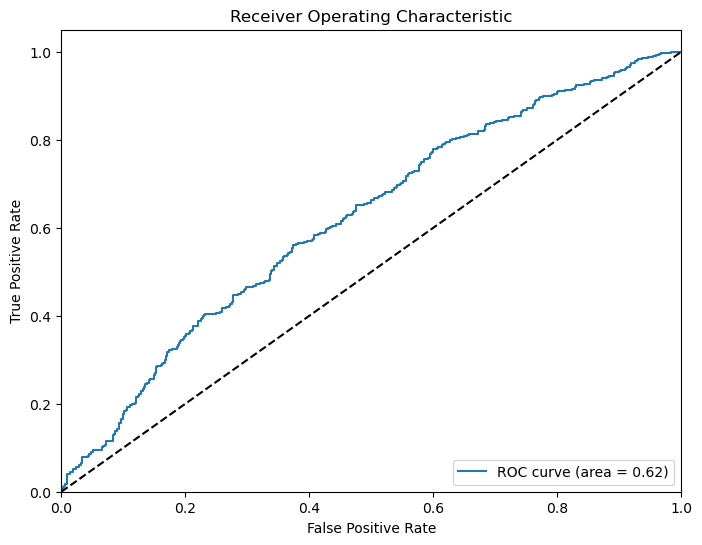

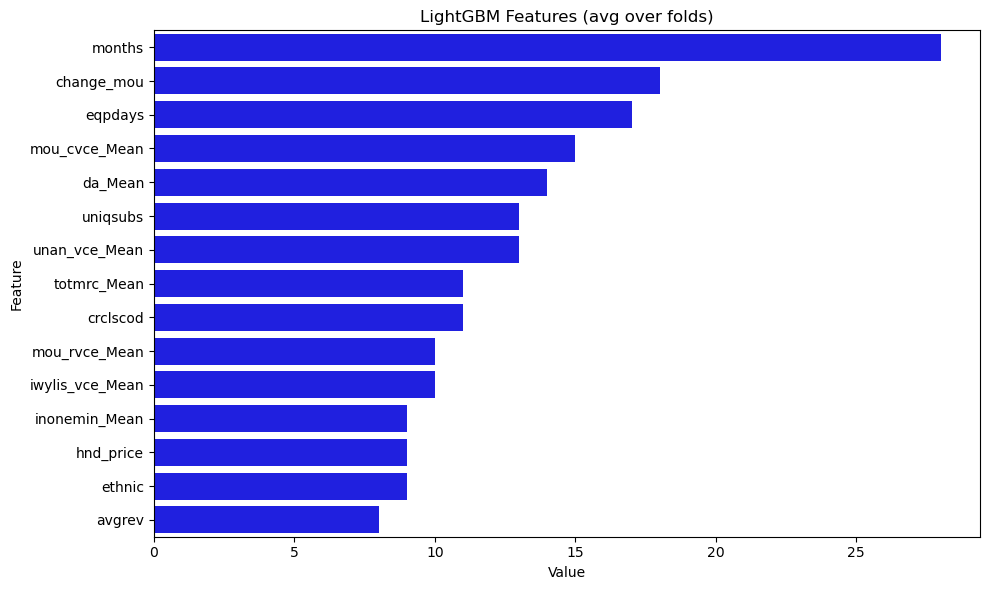

重要特徴量上位15個:
    Value          Feature
97     28           months
96     18       change_mou
95     17          eqpdays
94     15    mou_cvce_Mean
93     14          da_Mean
92     13         uniqsubs
91     13    unan_vce_Mean
90     11      totmrc_Mean
89     11         crclscod
88     10    mou_rvce_Mean
87     10  iwylis_vce_Mean
86      9    inonemin_Mean
85      9        hnd_price
84      9           ethnic
83      8           avgrev
months: 有意な差（群: churn=0が大きい）, p値 = 9.283472120802716e-10
eqpdays: 有意な差（群: churn=1が大きい）, p値 = 4.406285153825314e-08
mou_cvce_Mean: 有意な差（群: churn=0が大きい）, p値 = 1.7183535252417053e-05
uniqsubs: 有意な差（群: churn=1が大きい）, p値 = 0.000875409872982878
unan_vce_Mean: 有意な差（群: churn=0が大きい）, p値 = 0.0031662582601939535
totmrc_Mean: 有意な差（群: churn=0が大きい）, p値 = 2.252851751550642e-20
crclscod: 有意な差（群: churn=0が大きい）, p値 = 0.006641534532732803
mou_rvce_Mean: 有意な差（群: churn=0が大きい）, p値 = 2.049104193926838e-11
iwylis_vce_Mean: 有意な差（群: churn=0が大きい）, p値 = 2.5296166241969294e-05
ino

[I 2024-01-15 20:54:29,248] A new study created in memory with name: no-name-bbff9910-4224-4ca7-9925-4355f8c47550
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:38: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\kuros\AppData\Local\Temp\ipykernel_3832\2894811325.py:41: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[LightGBM] [Warning] feature_fraction is set=0.7657395711849755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7657395711849755
[LightGBM] [Warning] lambda_l1 is set=2.4313043307197844, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4313043307197844
[LightGBM] [Warning] lambda_l2 is set=0.0013741074251881489, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013741074251881489
[LightGBM] [Warning] bagging_fraction is set=0.9349481557543755, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9349481557543755
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7657395711849755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7657395711849755
[LightGBM] [Warning] lambda_l1 is set=2.4313043307197844, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4313043307197844
[LightGBM] [Warning] lambda_l2 

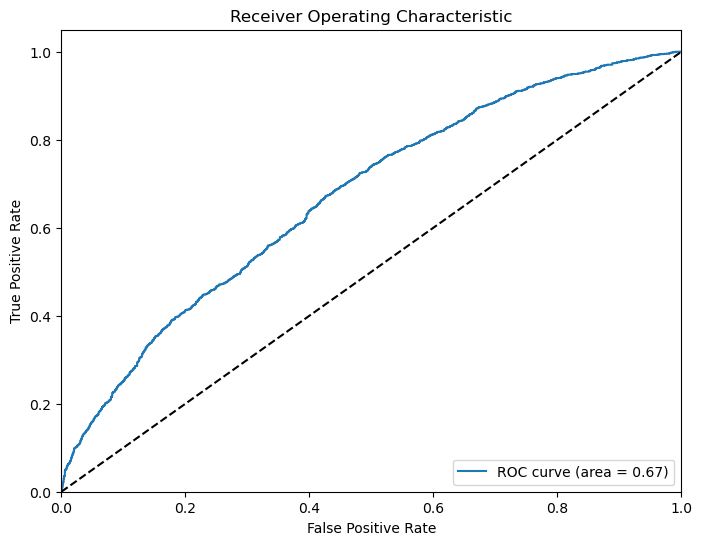

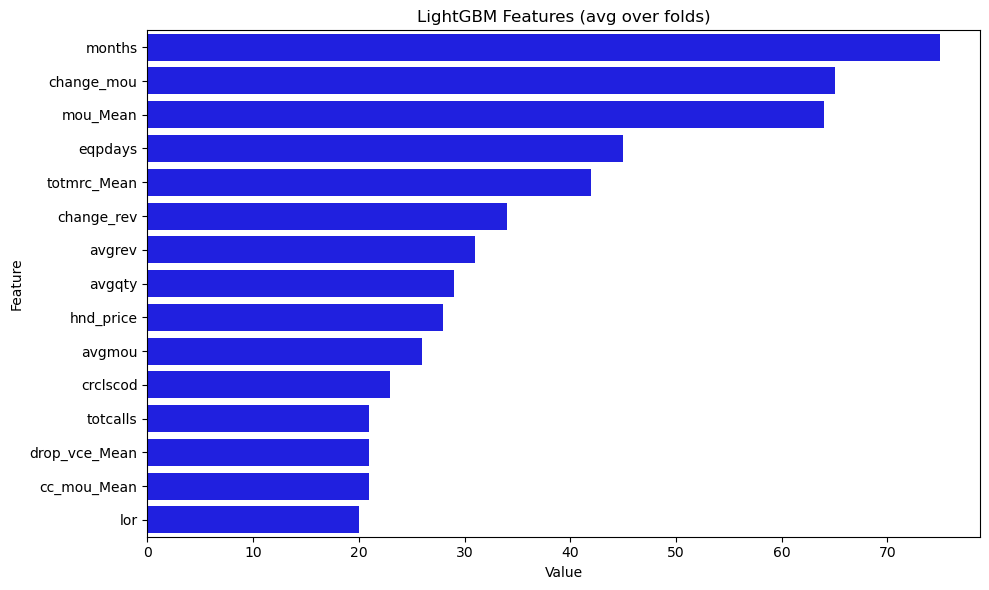

重要特徴量上位15個:
    Value        Feature
97     75         months
96     65     change_mou
95     64       mou_Mean
94     45        eqpdays
93     42    totmrc_Mean
92     34     change_rev
91     31         avgrev
90     29         avgqty
89     28      hnd_price
88     26         avgmou
87     23       crclscod
86     21       totcalls
85     21  drop_vce_Mean
84     21    cc_mou_Mean
83     20            lor
months: 有意な差（群: churn=1が大きい）, p値 = 0.0005943587512912728
change_mou: 有意な差（群: churn=0が大きい）, p値 = 7.475020534911145e-17
mou_Mean: 有意な差（群: churn=0が大きい）, p値 = 5.242809193645221e-14
eqpdays: 有意な差（群: churn=1が大きい）, p値 = 8.37418741907552e-60
totmrc_Mean: 有意な差（群: churn=0が大きい）, p値 = 9.278394360677089e-22
hnd_price: 有意な差（群: churn=0が大きい）, p値 = 3.908654131171664e-41
crclscod: 有意な差（群: churn=0が大きい）, p値 = 3.9284094524503745e-06
cc_mou_Mean: 有意な差（群: churn=0が大きい）, p値 = 0.01367345856560717
lor: 有意な差（群: churn=0が大きい）, p値 = 6.013594984166083e-05


In [22]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# グローバルな乱数ジェネレータのシードを設定
np.random.seed(42)

def lightGBM_ROC_optuna(dataset, target_column):
    # データを特徴量とターゲットに分割
    X = dataset.drop(columns=[target_column])
    y = dataset[target_column]

    # データセットをトレーニングデータとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 特徴量データを標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    def objective(trial):
        # ハイパーパラメータの設定
        param = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbosity': -1,
            'boosting_type': 'gbdt',
            'random_state': 42,
            'feature_fraction_seed': 42,
            'bagging_seed': 42, 
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        }

        # 5分割クロスバリデーションの設定
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        roc_aucs = []

        for train_idx, valid_idx in kfold.split(X_train_scaled, y_train):
            X_train_fold, X_valid_fold = X_train_scaled[train_idx], X_train_scaled[valid_idx]
            y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

            train_set = lgb.Dataset(X_train_fold, label=y_train_fold)
            valid_set = lgb.Dataset(X_valid_fold, label=y_valid_fold, reference=train_set)

            model = lgb.train(param, train_set, valid_sets=[valid_set])
            preds = model.predict(X_valid_fold)
            fpr, tpr, _ = roc_curve(y_valid_fold, preds)
            roc_auc = auc(fpr, tpr)
            roc_aucs.append(roc_auc)

        # 平均ROC AUCを返す
        avg_roc_auc = sum(roc_aucs) / len(roc_aucs)
        return avg_roc_auc

    # Optunaでハイパーパラメータチューニング
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, n_trials=50)

    # 最適なパラメータでモデルを訓練
    best_params = study.best_params
    model = lgb.LGBMClassifier(**best_params)
    model.fit(X_train_scaled, y_train)

    # 最適なハイパーパラメータの表示
    print("最適なハイパーパラメータ:", best_params)

    # ROC曲線の描画
    preds = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # 混同行列の表示
    preds_binary = (preds > 0.5).astype(int)  # 二値予測（0.5以上を1とする）
    cm = confusion_matrix(y_test, preds_binary)
    acc = accuracy_score(y_test, preds_binary)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # 特徴量の重要度の表示
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns)), columns=['Value','Feature'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(15), color="blue")
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

    # 特徴量の重要度上位15個の表示
    print("重要特徴量上位15個:")
    print(feature_imp.sort_values(by="Value", ascending=False).head(15))


    return feature_imp, best_params

# データの準備
original_dataset = high_rev
target_column = 'churn'

feature_importance, best_params = lightGBM_ROC_optuna(original_dataset, target_column)

from scipy.stats import ttest_ind

top_features = feature_importance.sort_values(by="Value", ascending=False).head(15)['Feature']
data_churn_0 = original_dataset[original_dataset['churn'] == 0][top_features]
data_churn_1 = original_dataset[original_dataset['churn'] == 1][top_features]
significant_diffs = {}
for feature in top_features:
    stat, p = ttest_ind(data_churn_0[feature], data_churn_1[feature])
    mean_0 = data_churn_0[feature].mean()
    mean_1 = data_churn_1[feature].mean()
    if p < 0.05: # p値が0.05未満の場合、有意な差とみなす
        group = "churn=0" if mean_0 > mean_1 else "churn=1"
        print(f"{feature}: 有意な差（群: {group}が大きい）, p値 = {p}")



churn_0 = remaining_data[remaining_data['churn'] == 0].sample(n=10000, random_state=43)
churn_1 = remaining_data[remaining_data['churn'] == 1].sample(n=10000, random_state=44)
original_dataset = pd.concat([churn_0, churn_1])
original_dataset = original_dataset.sample(frac=1, random_state=45).reset_index(drop=True)
feature_importance, best_params = lightGBM_ROC_optuna(original_dataset, target_column)

top_features = feature_importance.sort_values(by="Value", ascending=False).head(15)['Feature']
data_churn_0 = original_dataset[original_dataset['churn'] == 0][top_features]
data_churn_1 = original_dataset[original_dataset['churn'] == 1][top_features]
significant_diffs = {}
for feature in top_features:
    stat, p = ttest_ind(data_churn_0[feature], data_churn_1[feature])
    mean_0 = data_churn_0[feature].mean()
    mean_1 = data_churn_1[feature].mean()
    if p < 0.05: # p値が0.05未満の場合、有意な差とみなす
        group = "churn=0" if mean_0 > mean_1 else "churn=1"
        print(f"{feature}: 有意な差（群: {group}が大きい）, p値 = {p}")





[I 2024-01-12 16:18:31,373] A new study created in memory with name: no-name-06bcbff1-ade1-456c-8d62-e5c3f9afa861


[I 2024-01-12 16:18:35,014] Trial 0 finished with value: 0.5504092219748836 and parameters: {'hidden_size1': 148, 'hidden_size2': 128, 'dropout_rate': 0.4136776057915627, 'lr': 0.029132775744562422}. Best is trial 0 with value: 0.5504092219748836.
[I 2024-01-12 16:18:38,123] Trial 1 finished with value: 0.5768938972453288 and parameters: {'hidden_size1': 167, 'hidden_size2': 37, 'dropout_rate': 0.48100493274209233, 'lr': 0.000125113041268694}. Best is trial 1 with value: 0.5768938972453288.
[I 2024-01-12 16:18:41,985] Trial 2 finished with value: 0.6222465291233699 and parameters: {'hidden_size1': 192, 'hidden_size2': 66, 'dropout_rate': 0.33344899056063176, 'lr': 0.0016597601001057901}. Best is trial 2 with value: 0.6222465291233699.
[I 2024-01-12 16:18:44,701] Trial 3 finished with value: 0.5119594562456002 and parameters: {'hidden_size1': 123, 'hidden_size2': 41, 'dropout_rate': 0.2655125063145722, 'lr': 1.6126742490638665e-05}. Best is trial 2 with value: 0.6222465291233699.
[I 202

Top 15 Feature Importance based on Gradients:
ethnic
avg3mou
threeway_Mean
totmrc_Mean
avgmou
avg3qty
ovrmou_Mean
months
roam_Mean
rev_Mean
mou_Mean
uniqsubs
eqpdays
change_rev
change_mou
AUC: 0.6386
Accuracy: 0.5988


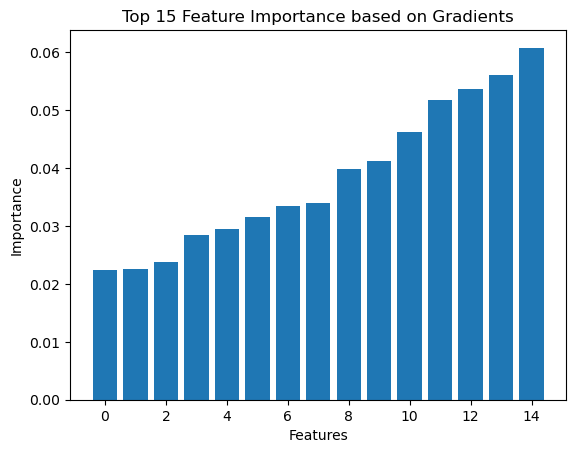

In [ ]:
#DNNで離脱予測
#ethnic, avg3mou,threeway_Mean,avg3qty,roam_Mean,uniqsubsがlightGBMにない重要特徴量だった

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
import optuna
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class BinaryClassificationModel(nn.Module):
    def __init__(self, num_features, hidden_size1, hidden_size2, dropout_rate):
        super(BinaryClassificationModel, self).__init__()
        self.layer1 = nn.Linear(num_features, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        return x

def calculate_gradient_importance(model, X):
    X_tensor = torch.tensor(X, dtype=torch.float32, requires_grad=True)
    y_pred = model(X_tensor)
    y_pred.backward(torch.ones_like(y_pred))
    gradients = X_tensor.grad.abs().numpy()
    return np.mean(gradients, axis=0)

def objective(trial):
    model = BinaryClassificationModel(
        num_features=X_train.shape[1],
        hidden_size1=trial.suggest_int("hidden_size1", 64, 256),
        hidden_size2=trial.suggest_int("hidden_size2", 32, 128),
        dropout_rate=trial.suggest_float("dropout_rate", 0.2, 0.5)
    )
    optimizer = optim.Adam(model.parameters(), lr=trial.suggest_float("lr", 1e-5, 1e-1, log=True))
    criterion = nn.BCELoss()

    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train[:, None], dtype=torch.float32))
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy()
    y_pred_label = (y_pred > 0.5).astype(np.int64).flatten()
    accuracy = accuracy_score(y_test, y_pred_label)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return (accuracy + roc_auc) / 2

def train_and_evaluate(df, target_column):
    global X_train, X_test, y_train, y_test
    X = df.drop(columns=[target_column]).values
    y = df[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)
    best_params = study.best_params

    model = BinaryClassificationModel(
        X_train.shape[1],
        best_params['hidden_size1'],
        best_params['hidden_size2'],
        best_params['dropout_rate']
    )
    optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
    criterion = nn.BCELoss()

    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train[:, None], dtype=torch.float32))
        loss.backward()
        optimizer.step()

    model.eval()
    feature_importance = calculate_gradient_importance(model, X_train)

    top_indices = np.argsort(feature_importance)[-15:]
    top_features = df.drop(columns=[target_column]).columns[top_indices]

    print("Top 15 Feature Importance based on Gradients:")
    for feature in top_features:
        print(feature)

    model.eval()
    with torch.no_grad():
        y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy()
    y_pred_label = (y_pred > 0.5).astype(np.int64).flatten()
    accuracy = accuracy_score(y_test, y_pred_label)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
    print(f'Accuracy: {accuracy:.4f}')

    plt.bar(range(len(top_indices)), feature_importance[top_indices])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top 15 Feature Importance based on Gradients')
    plt.show()

    return model

# データセットとターゲットの列名の指定
original_dataset = high_rev
target_column = 'churn'

# 訓練と重要特徴量の取得
model = train_and_evaluate(original_dataset, target_column)
